# 作業

實作各種不一樣的方式來調整飽和 / 對比 / 明亮

1. 改變 color space 來調整飽和度
2. 實作直方圖均衡
3. alpha/ beta 調整對比 / 明亮

In [32]:
import cv2
import numpy as np

img_path = 'data/lena.png'

# 以彩色圖片的方式載入
img = cv2.imread(img_path, cv2.IMREAD_COLOR)

## 改變飽和度

- 轉換成 HSV color space, 改變 s channel 的值

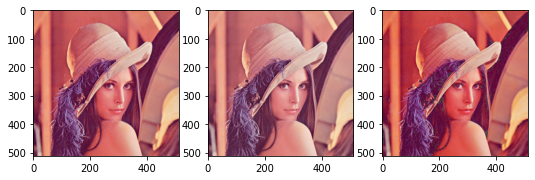

In [57]:
# 為了要改變飽和度，我們先把 color space 轉成 HSV 格式
img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
change_percentage = 0.2

# 針對飽和度的值做改變，超過界線 0~1 的都會 bound
# 在 HSV color space 減少飽和度
img_hsv_down = img_hsv.astype('float32')
img_hsv_down[..., 1] = img_hsv_down[..., 1] * (1 - change_percentage)
img_hsv_down = img_hsv_down.astype('uint8')

# 在 HSV color space 增加飽和度
img_hsv_up = img_hsv.astype('float32')
img_hsv_up[..., 1] = img_hsv_up[..., 1] * (1 + change_percentage)
img_hsv_up = img_hsv_up.astype('uint8')

# 轉換 color space 回 BGR
img_hsv_down = cv2.cvtColor(img_hsv_down, cv2.COLOR_HSV2BGR)
img_hsv_up = cv2.cvtColor(img_hsv_up, cv2.COLOR_HSV2BGR)


def cv2plt(img):
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    return img

# 組合圖片 + 顯示圖片
from matplotlib import pyplot as plt
f = plt.figure(figsize=(12, 6))

f.add_subplot(1, 4, 1)
plt.imshow(cv2plt(img))

f.add_subplot(1, 4, 2)
plt.imshow(cv2plt(img_hsv_down))

f.add_subplot(1, 4, 3)
plt.imshow(cv2plt(img_hsv_up))

plt.show(block=True)

## 直方圖均衡

1. case 1: 把彩圖拆開對每個 channel 個別做直方圖均衡再組合起來
2. case 2: 轉換 color space 到 HSV 之後對其中一個 channel 做直方圖均衡

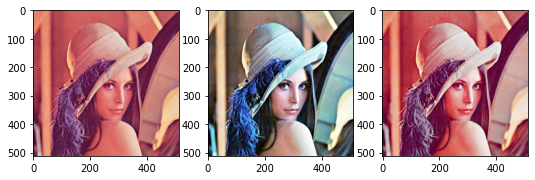

In [68]:
# case 1
# 每個 channel 個別做直方圖均衡
(b, g, r) = cv2.split(img)
# equalHist_by_channel =

# 組合經過直方圖均衡的每個 channel
img_bgr_equal = cv2.merge((cv2.equalizeHist(b), cv2.equalizeHist(g), cv2.equalizeHist(r)))




# case 2 - 轉換 color space 後只對其中一個 channel 做直方圖均衡
img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
img_hsv_equal = cv2.merge((img_hsv[..., 0], cv2.equalizeHist(img_hsv[..., 1]), img_hsv[..., 2]))
img_hsv_equal = cv2.cvtColor(img_hsv_equal, cv2.COLOR_HSV2BGR)

# 組合圖片 + 顯示圖片
# img_bgr_equalHist = np.hstack((img, img_bgr_equal, img_hsv_equal))
f = plt.figure(figsize=(12, 6))

f.add_subplot(1, 4, 1)
plt.imshow(cv2plt(img))

f.add_subplot(1, 4, 2)
plt.imshow(cv2plt(img_bgr_equal))

f.add_subplot(1, 4, 3)
plt.imshow(cv2plt(img_hsv_equal))

plt.show(block=True)

## 調整對比 / 明亮

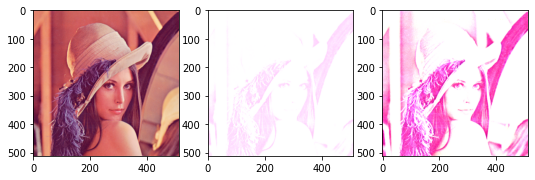

In [79]:
# alpha: 控制對比度 (1.0~3.0)
# beta: 控制明亮度 (0~255)
add_contrast = cv2.convertScaleAbs(img, alpha=1.0, beta=200)
add_lighness = cv2.convertScaleAbs(img, alpha=3.0, beta=0)

# 組合圖片 + 顯示圖片
# img_contrast_light = np.hstack((img, add_contrast, add_lighness))
f = plt.figure(figsize=(12, 6))

f.add_subplot(1, 4, 1)
plt.imshow(cv2plt(img))

f.add_subplot(1, 4, 2)
plt.imshow(cv2plt(add_contrast))

f.add_subplot(1, 4, 3)
plt.imshow(cv2plt(add_lighness))

plt.show(block=True)